In [ ]:
import pandas as pd

csv_file_path = 'train.csv'
df = pd.read_csv(csv_file_path)


test_df = pd.read_csv("test.csv")

In [ ]:
df.head()

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,310.0806,0.9148,82546,0.7169,1.6753,0.3165,0.7531,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,354.8622,0.9585,103181,0.7679,1.7691,0.6579,0.7436,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,328.4843,0.9121,92914,0.7162,2.0465,0.6195,0.6804,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,353.5700,0.9543,102890,0.7316,1.4843,0.5763,0.8140,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,346.2672,0.9643,97656,0.6836,1.5808,0.7363,0.7868,0.0047,0.0030,0.6190,0.9785,0


In [ ]:
df.shape

(1288, 17)

In [ ]:
df.columns

Index(['area', 'perimeter', 'major_axis', 'minor_axis', 'eccentricity',
       'eqdiasq', 'solidity', 'convex_area', 'extent', 'aspect_ratio',
       'roundness', 'compactness', 'shapefactor_1', 'shapefactor_2',
       'shapefactor_3', 'shapefactor_4', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           1288 non-null   int64  
 1   perimeter      1288 non-null   float64
 2   major_axis     1288 non-null   float64
 3   minor_axis     1288 non-null   float64
 4   eccentricity   1288 non-null   float64
 5   eqdiasq        1288 non-null   float64
 6   solidity       1288 non-null   float64
 7   convex_area    1288 non-null   int64  
 8   extent         1288 non-null   float64
 9   aspect_ratio   1288 non-null   float64
 10  roundness      1288 non-null   float64
 11  compactness    1288 non-null   float64
 12  shapefactor_1  1288 non-null   float64
 13  shapefactor_2  1288 non-null   float64
 14  shapefactor_3  1288 non-null   float64
 15  shapefactor_4  1288 non-null   float64
 16  target         1288 non-null   int64  
dtypes: float64(14), int64(3)
memory usage: 171.2 KB


In [ ]:
import numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# class distribution
print(df.groupby('target').size())

target
0    551
1    737
dtype: int64


In [ ]:
#Histogram
data_numeric = df.select_dtypes(include='number')
column_numeric = data_numeric.columns.drop('target')
data_numeric.head()

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,310.0806,0.9148,82546,0.7169,1.6753,0.3165,0.7531,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,354.8622,0.9585,103181,0.7679,1.7691,0.6579,0.7436,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,328.4843,0.9121,92914,0.7162,2.0465,0.6195,0.6804,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,353.5700,0.9543,102890,0.7316,1.4843,0.5763,0.8140,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,346.2672,0.9643,97656,0.6836,1.5808,0.7363,0.7868,0.0047,0.0030,0.6190,0.9785,0


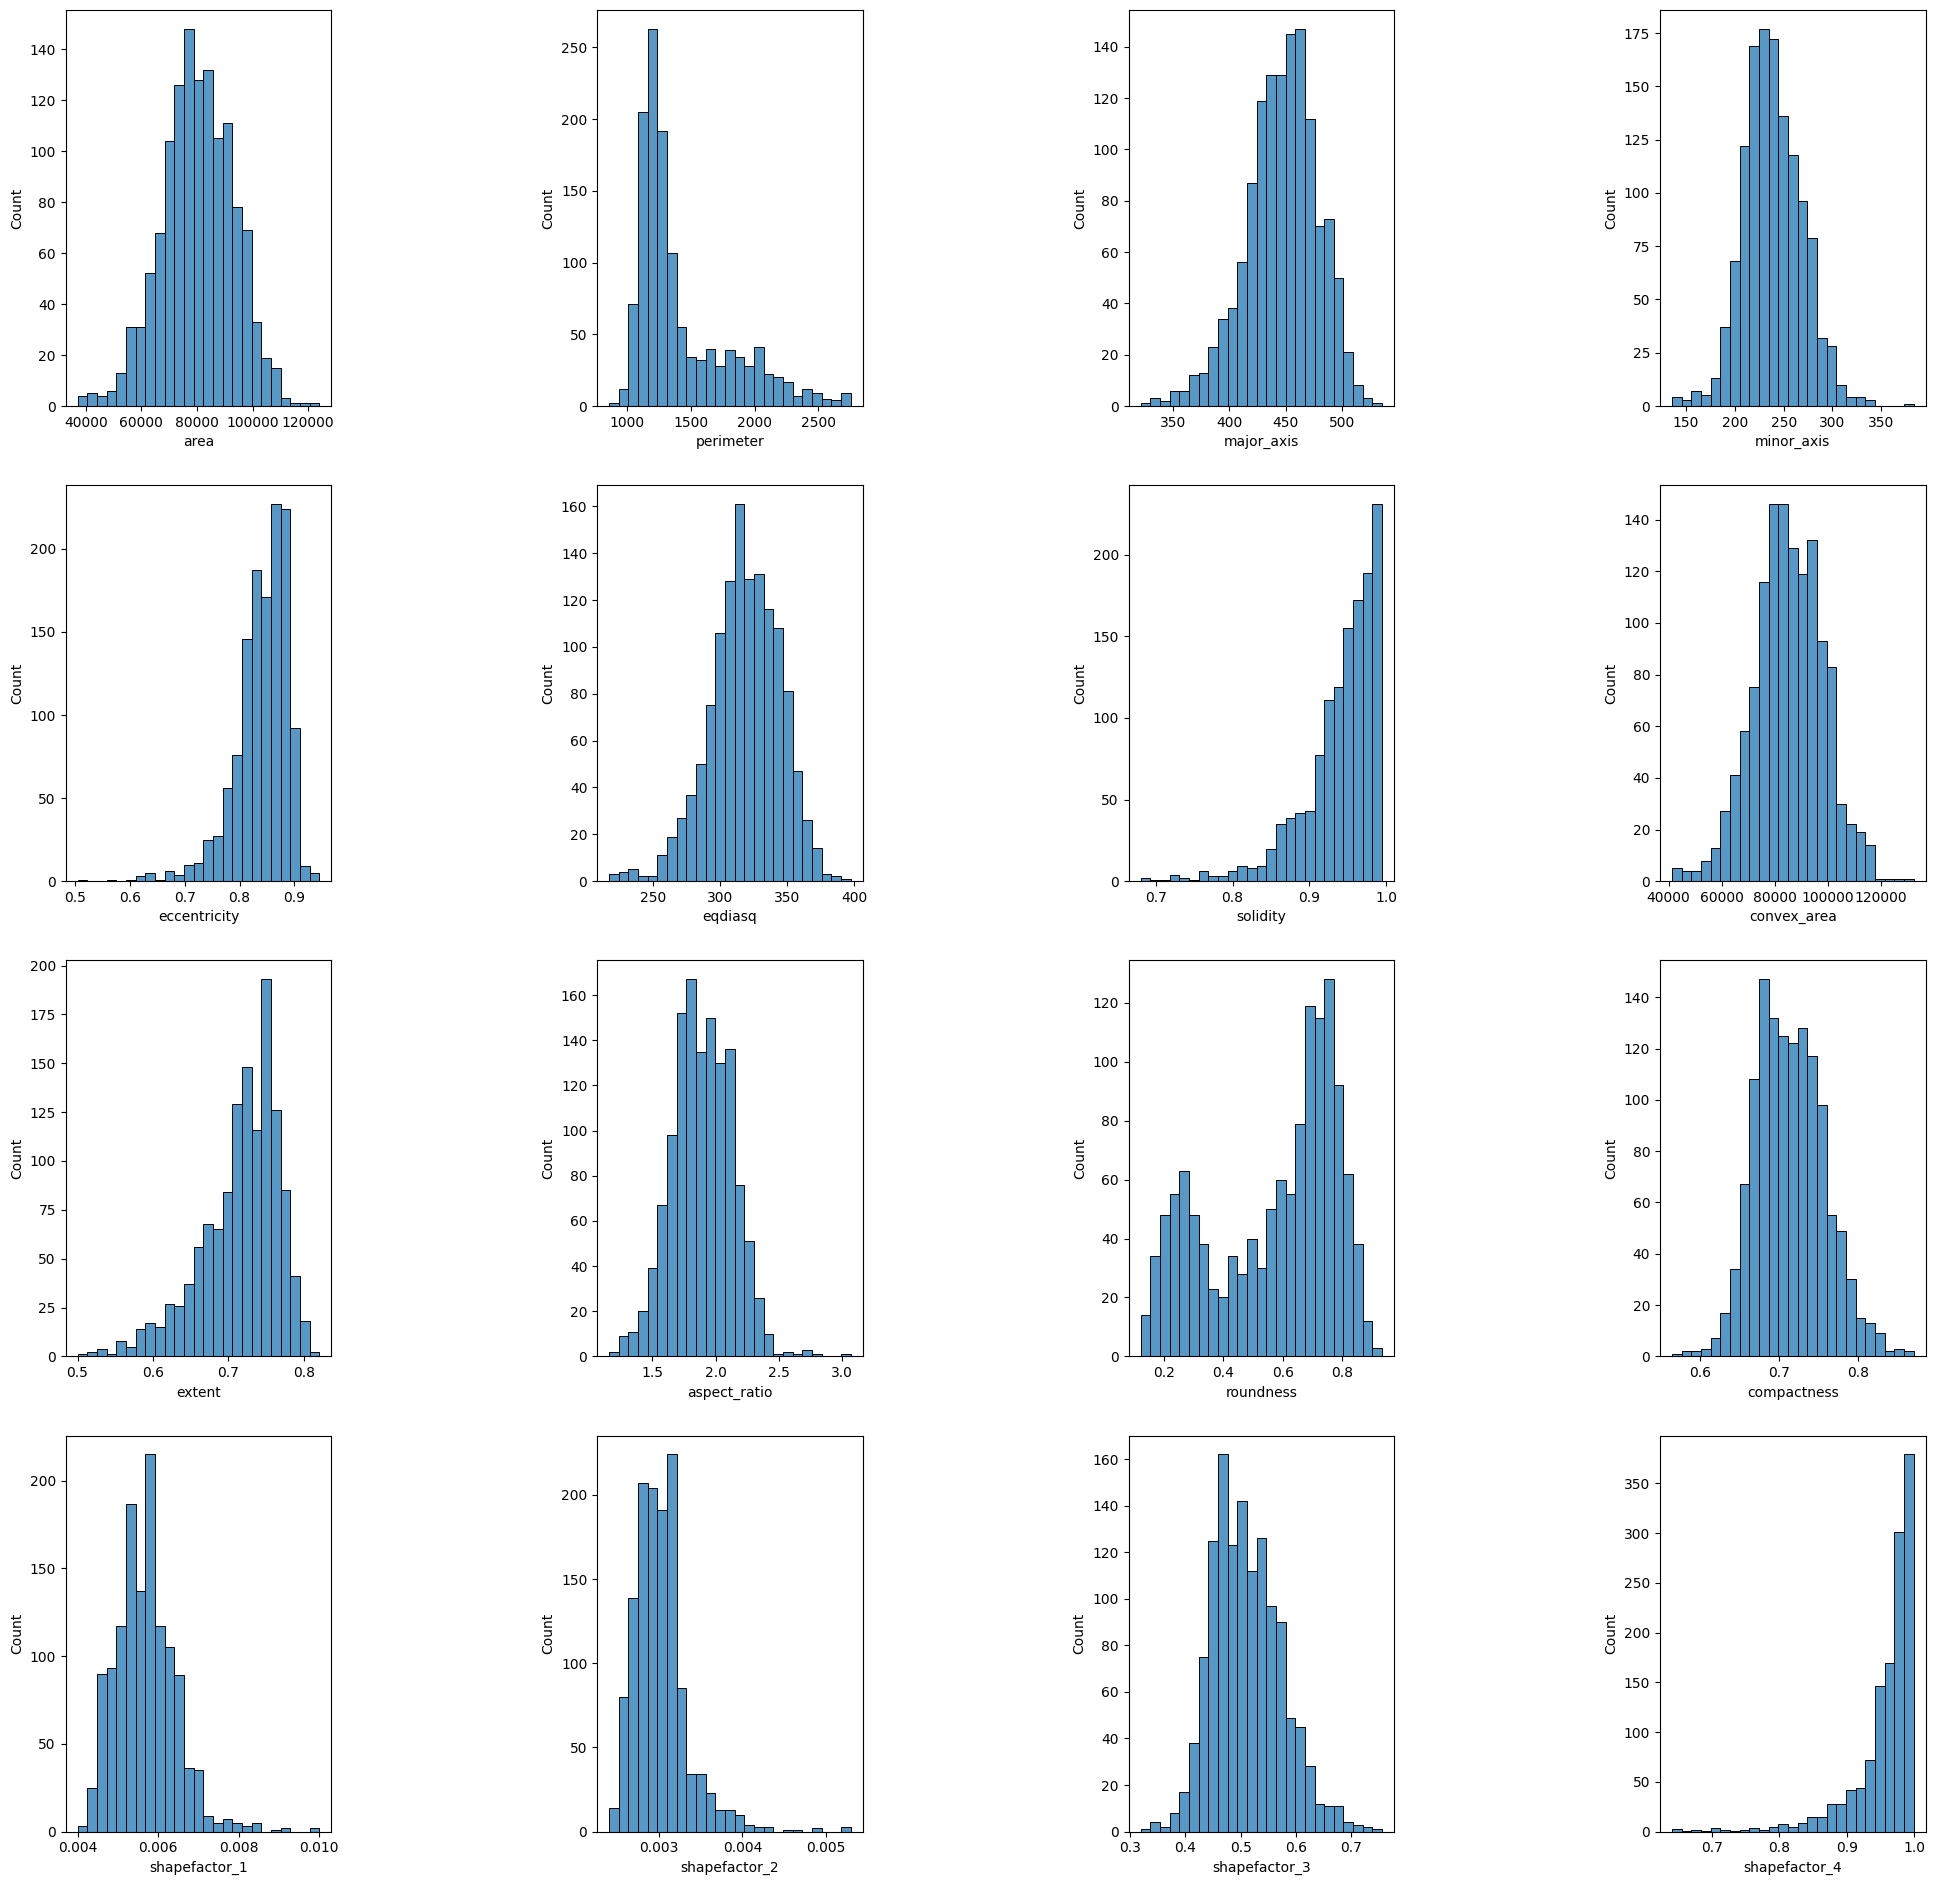

In [ ]:
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(6,4,i)
    sns.histplot(data = df[col_name],  bins = 25)
    i +=1

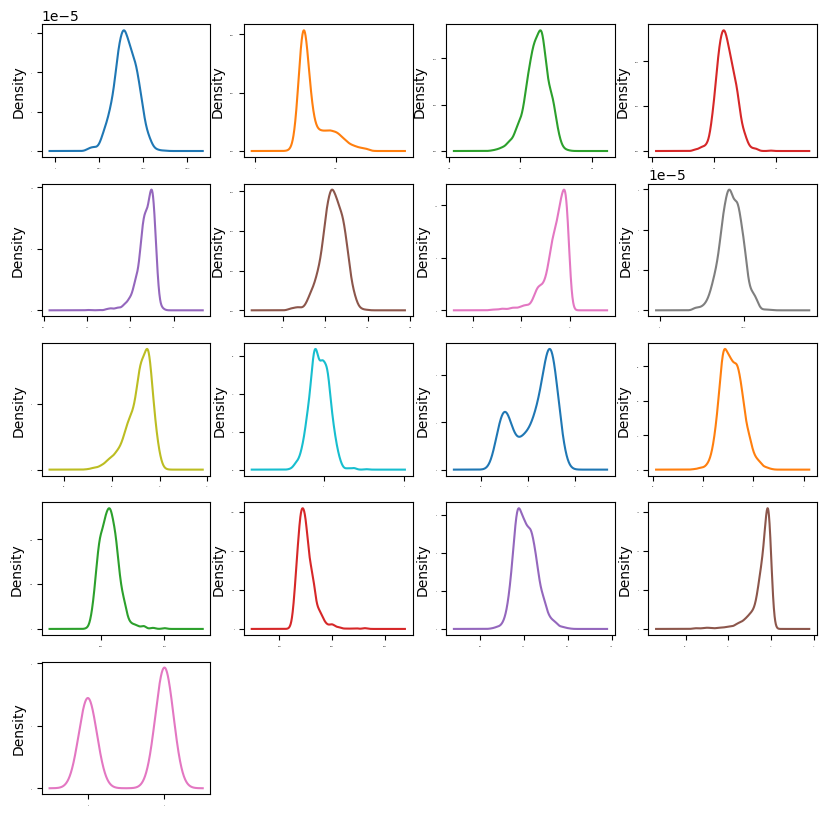

In [ ]:
# визуализация распределение плотности
data_numeric.plot(kind='density', subplots=True, layout=(5,4), figsize=(10, 10), sharex=False, legend=False, fontsize=1)
plt.show()

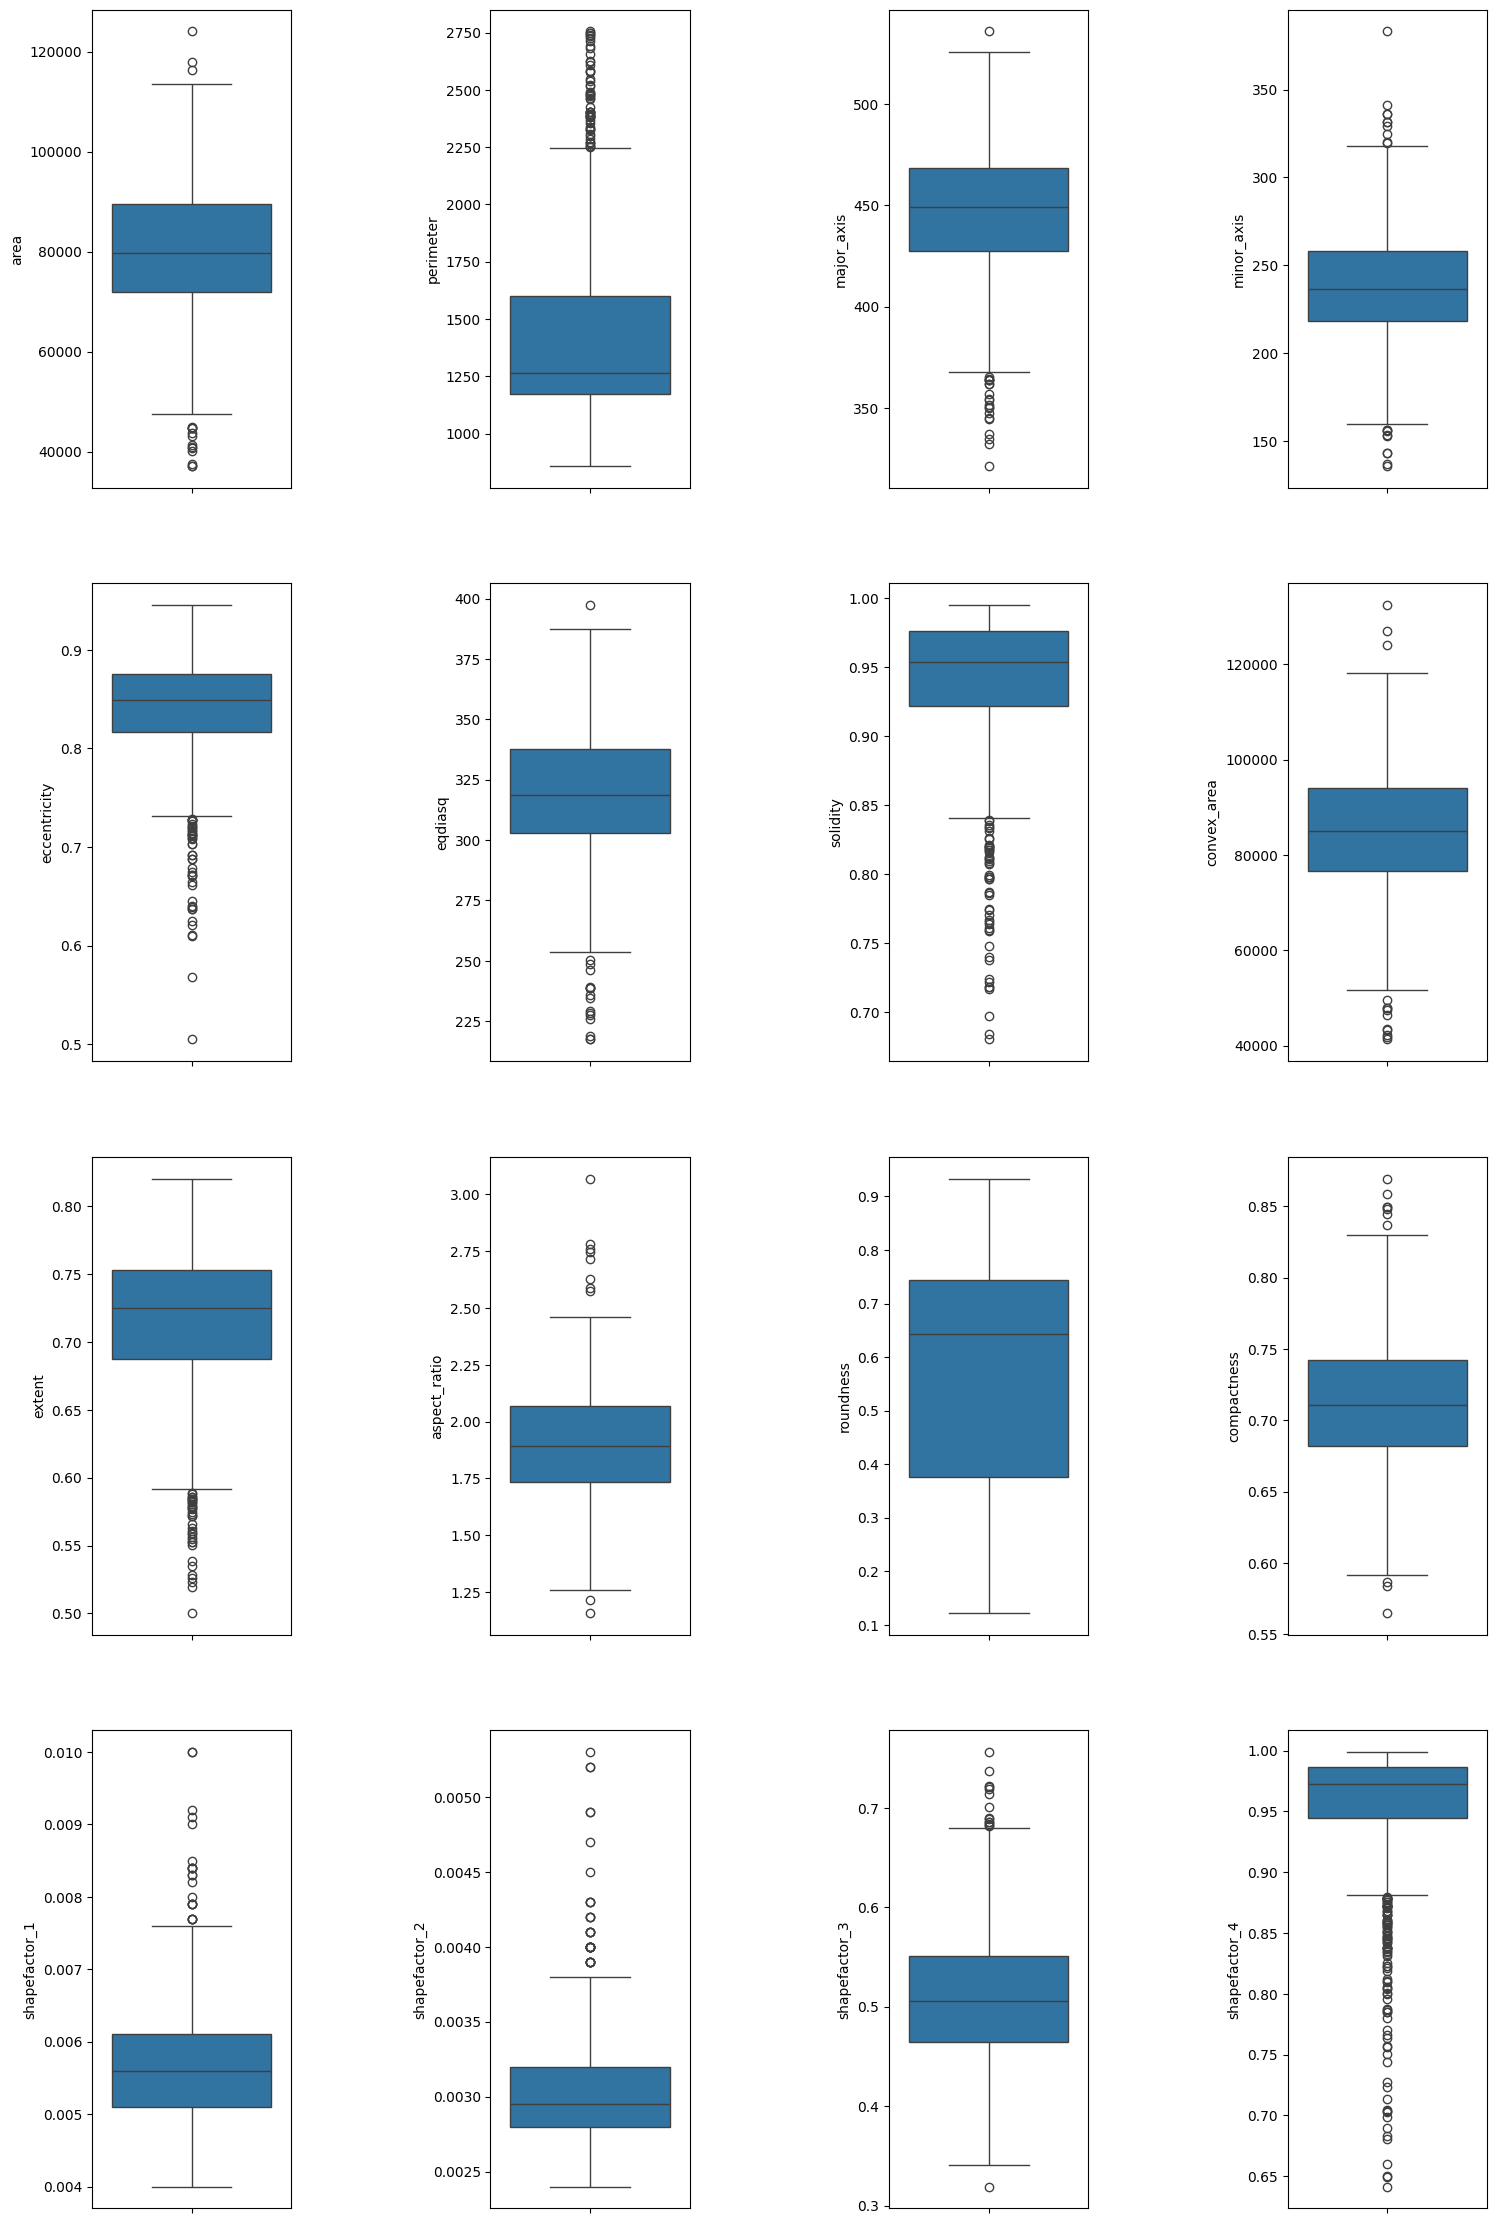

In [ ]:
# Box Plots

plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)


i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=df, y=col_name)
    i +=1

In [ ]:
corr_data=data_numeric.corr()['target'].sort_values()
corr_data

,target
minor_axis,-0.662724
shapefactor_3,-0.624701
compactness,-0.624429
area,-0.591959
convex_area,-0.584605
eqdiasq,-0.582799
perimeter,-0.150358
major_axis,-0.140508
solidity,-0.118001
roundness,-0.101168


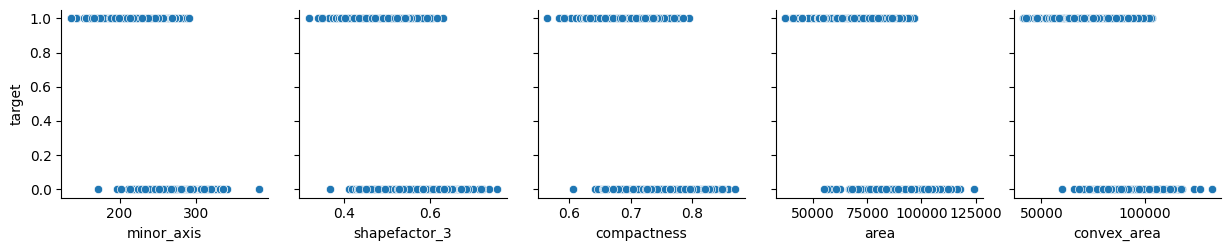

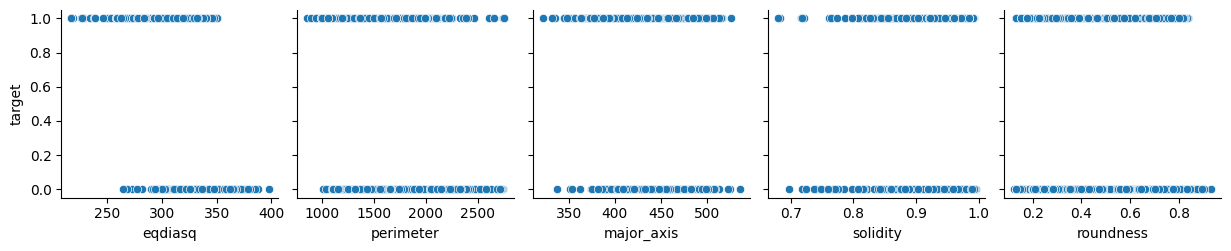

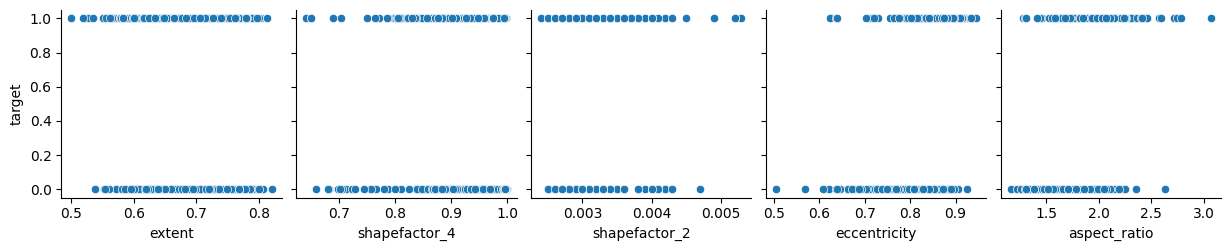

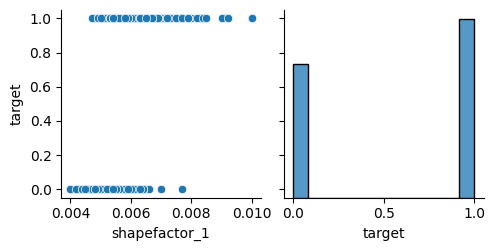

In [ ]:
for i in range(0, len(corr_data.index), 5):
    sns.pairplot(data=data_numeric,
                x_vars = corr_data.index[i : i + 5],
                y_vars = ['target'])

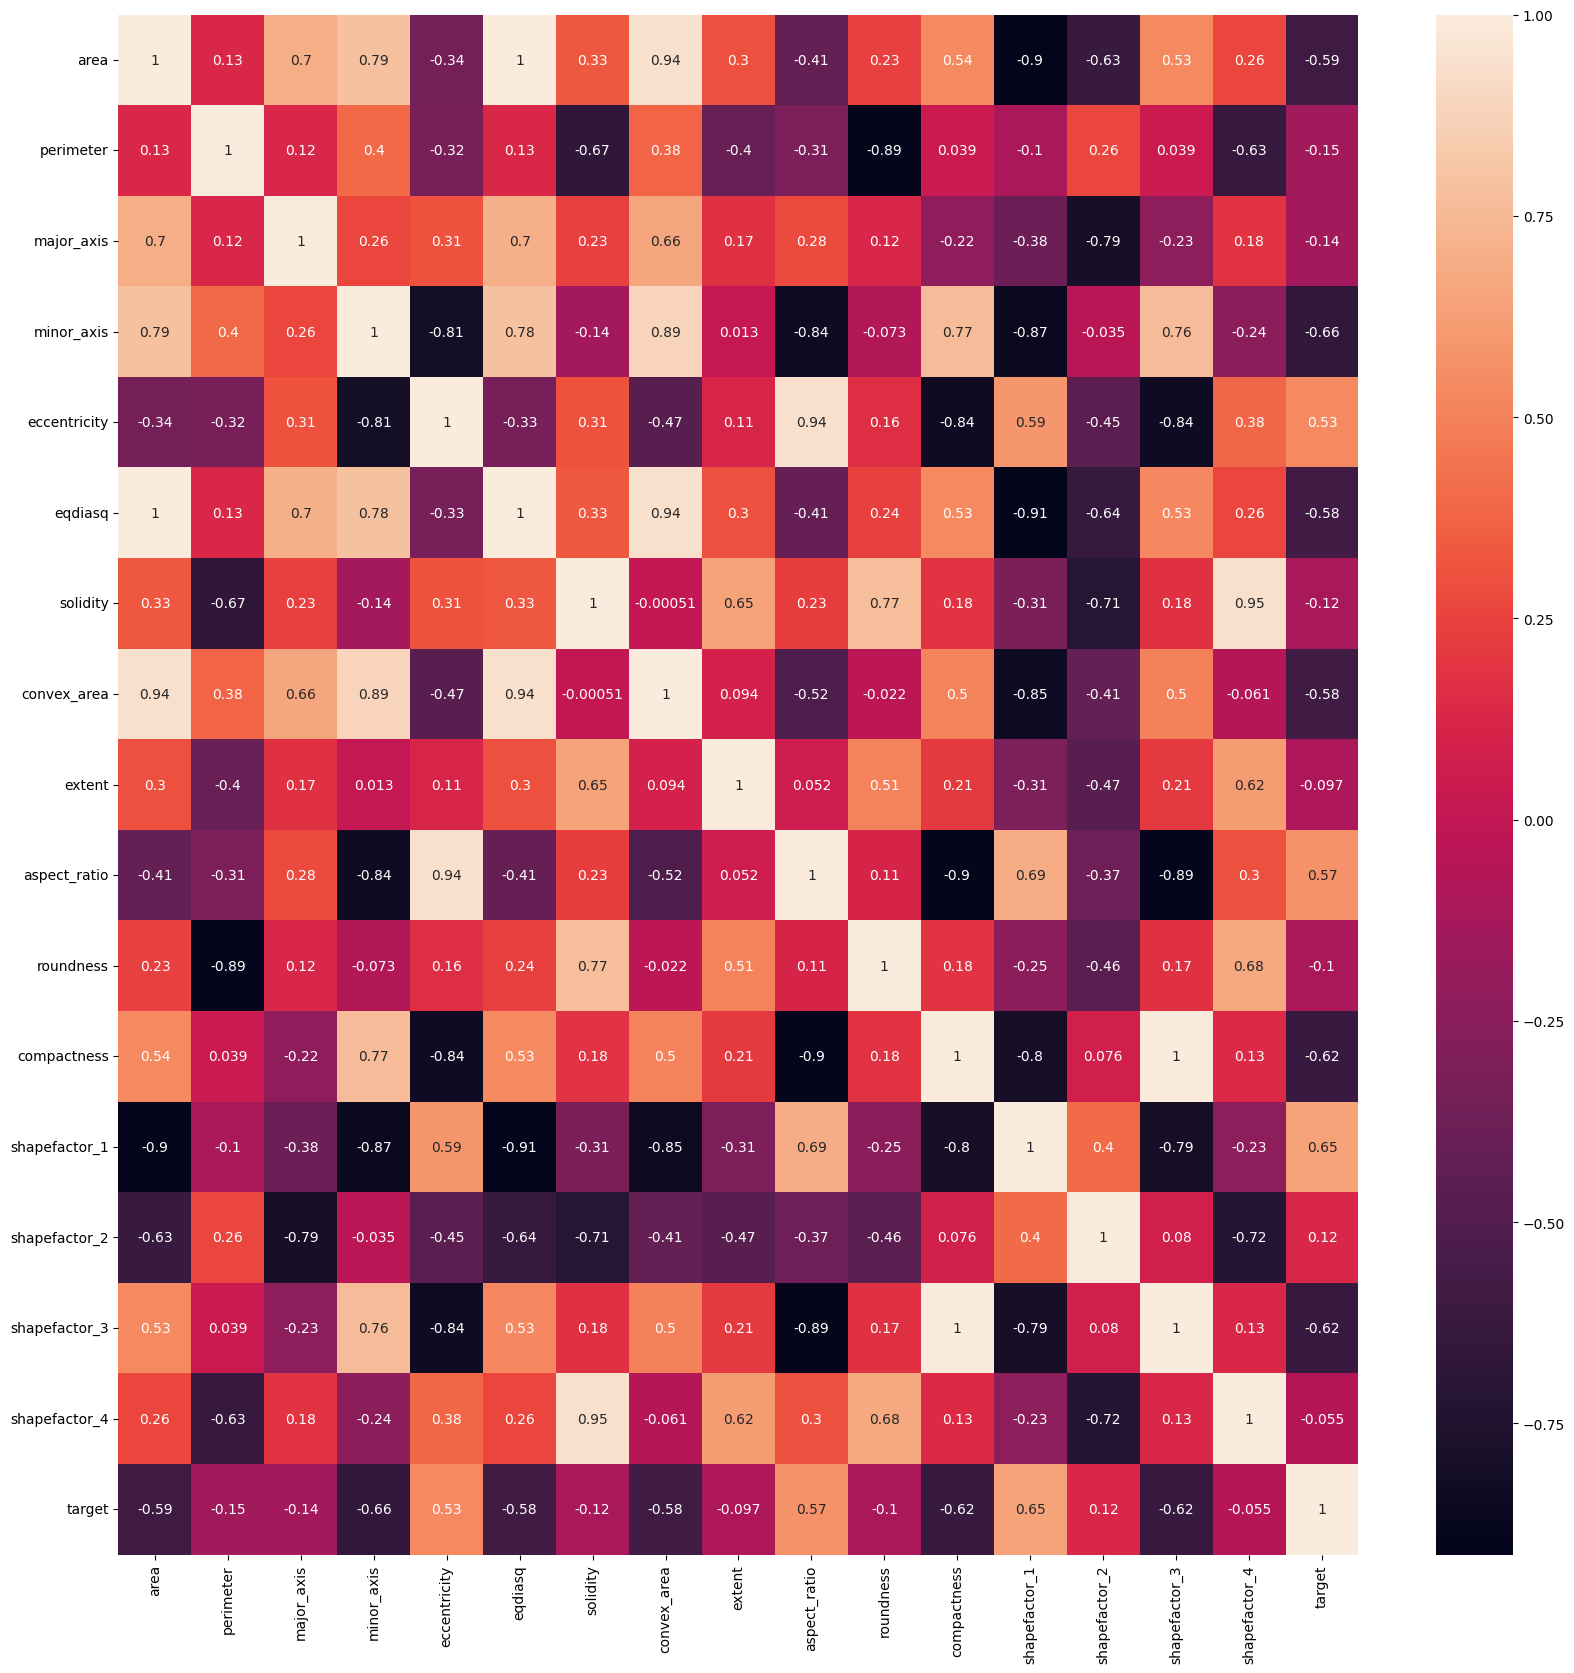

In [ ]:
# визуализация
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_numeric.corr(), annot = True)
plt.show()

In [ ]:
def correl(X_train, thresh):
    cor = X_train.corr()
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    all_cor = c1[c1.values != 1]
    return all_cor[abs(all_cor) > thresh]

In [ ]:
corr_data=data_numeric.corr()['compactness'].sort_values()
corr_data

,compactness
aspect_ratio,-0.896326
eccentricity,-0.838209
shapefactor_1,-0.802317
target,-0.624429
major_axis,-0.224794
perimeter,0.039118
shapefactor_2,0.075865
shapefactor_4,0.134340
roundness,0.178009
solidity,0.180303


In [ ]:
# Split-out validation dataset
array = df.values
X = array[:,0:16].astype(float)
Y = array[:,16]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.856311 (0.050597)
LDA: 0.861165 (0.036340)
KNN: 0.747573 (0.047958)
CART: 0.799029 (0.028817)
NB: 0.817476 (0.042718)
SVM: 0.783495 (0.038112)


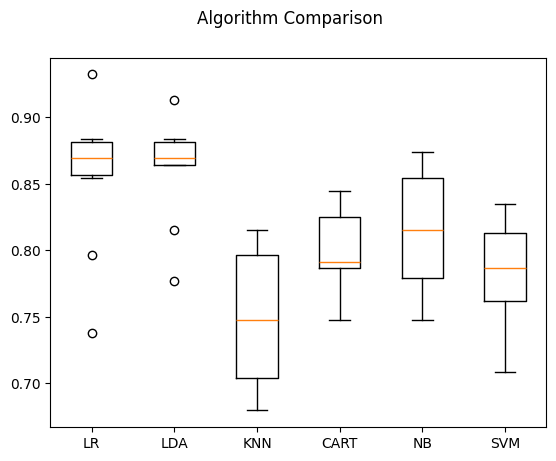

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
comps = 8
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=comps)),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=comps)),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=comps)),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=comps)),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=comps)),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=comps)),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,  shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.866990 (0.047374)
ScaledLDA: 0.868932 (0.037161)
ScaledKNN: 0.863107 (0.036184)
ScaledCART: 0.793204 (0.054239)
ScaledNB: 0.862136 (0.044871)
ScaledSVM: 0.867961 (0.034243)


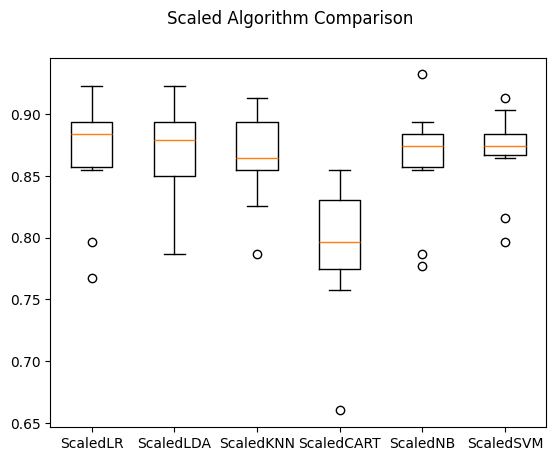

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
best_model = grid_result.best_estimator_

rescaled_test_df = scaler.transform(test_df)

test_predictions = best_model.predict(rescaled_test_df)

print("\n--- Predictions on test_df using the Best Model ---")



Best: 0.873786 using {'C': 1.3, 'kernel': 'rbf'}

--- Predictions on test_df using the Best Model ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
open("answer.csv",'w').write("\n".join([str(i) for i in list(test_predictions)]))


1719

In [ ]:
# DecisionTree_hyperparameters = {
#     'max_depth': [3, 5, 7, None],
#     'min_samples_split': [2, 4, 6, 8],
#     'min_samples_leaf': [1, 2, 3, 4],
#     'criterion': ['gini', 'entropy']
# }

# RandomForest_hyperparameters = {
#     'n_estimators': [100],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 3],
#     'criterion': ['gini', 'entropy']
# }



# SVM_hyperparameters = {
#     'C': [0.1, 1.0, 10.0],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4]
# }

KNN_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

LogisticRegression_hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search for each model
models = {
    # 'DecisionTree': DecisionTreeClassifier(),
    # 'RandomForest': RandomForestClassifier(),

    # 'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}

for model_name, model in models.items():
    hyperparameters = eval(model_name + '_hyperparameters')
    grid_search = GridSearchCV(model, hyperparameters, cv=5)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"{model_name} Best Parameters: {best_params}")
    print(f"{model_name} Best Score: {best_score}")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++")

KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
KNN Best Score: 0.774757281553398
++++++++++++++++++++++++++++++++++++++++++++++++++++


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

LogisticRegression Best Parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression Best Score: 0.8650485436893204
++++++++++++++++++++++++++++++++++++++++++++++++++++


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# ensembles
ensembles = []

# 1. AdaBoost with PCA
ensembles.append(('AB', Pipeline([
    ('PCA', PCA(n_components=16)),
    ('AB', AdaBoostClassifier(random_state=seed))
])))

# 2. Gradient Boosting Machine with PCA
ensembles.append(('GBM', Pipeline([
    ('PCA', PCA(n_components=16)),
    ('GBM', GradientBoostingClassifier(random_state=seed))
])))

# 3. Random Forest with PCA
ensembles.append(('RF', Pipeline([
    ('PCA', PCA(n_components=16)),
    ('RF', RandomForestClassifier(random_state=seed))
])))

# 4. Extra Trees with PCA
ensembles.append(('ET', Pipeline([
    ('PCA', PCA(n_components=16)),
    ('ET', ExtraTreesClassifier(random_state=seed))
])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TypeError: missing a required argument: 'X'

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.3)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))